In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


## 把图像从rgb换成bgr

In [18]:
img=mpimg.imread('imori.jpg').copy()

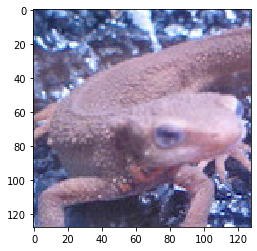

In [19]:
plt.imshow(img)

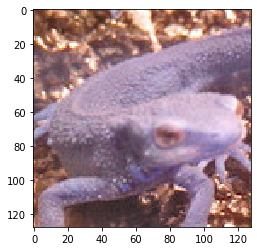

In [20]:
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

img[:, :, 0] = r
img[:, :, 1] = g
img[:, :, 2] = b

plt.imshow(img)

## 灰度化

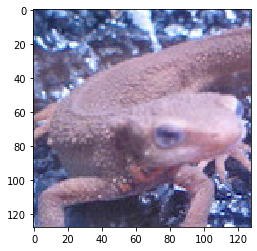

In [31]:
img = mpimg.imread("imori.jpg").astype(np.float)
img = img/255
plt.imshow(img)
img = img*255

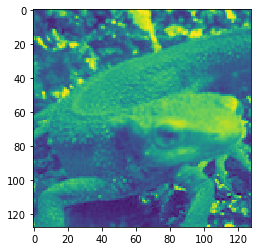

In [35]:
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

out = 0.2989 * r + 0.5870 * g + 0.1140 * b
out = out.astype(np.uint8)

plt.imshow(out)

## 变黑白

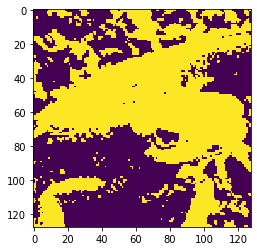

In [36]:
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

out = 0.2989 * r + 0.5870 * g + 0.1140 * b
out = out.astype(np.uint8)

th = 128
out[out < th] = 0
out[out >= th] = 255

plt.imshow(out)

## 色相反转

/Users/sizhenhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/sizhenhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater_equal
/Users/sizhenhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less


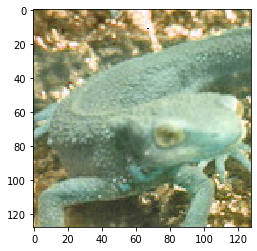

In [37]:
img = img/255.
out = np.zeros_like(img)

max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
ind = np.where(min_arg == 0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
ind = np.where(min_arg == 2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
ind = np.where(min_arg == 1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    
V = max_v.copy()
S = max_v.copy() - min_v.copy()

H = (H + 180) % 360

C = S
H_ = H / 60
X = C * (1 - np.abs( H_ % 2 - 1))
Z = np.zeros_like(H)

vals = [[Z,X,C], [Z,C,X], [X,C,Z], [C,X,Z], [C,Z,X], [X,Z,C]]

for i in range(6):
    ind = np.where((i <= H_) & (H_ < (i+1)))
    out[..., 0][ind] = (V-C)[ind] + vals[i][0][ind]
    out[..., 1][ind] = (V-C)[ind] + vals[i][1][ind]
    out[..., 2][ind] = (V-C)[ind] + vals[i][2][ind]

out[np.where(max_v == min_v)] = 0
out = (out * 255).astype(np.uint8) 

plt.imshow(out)

## 减色处理

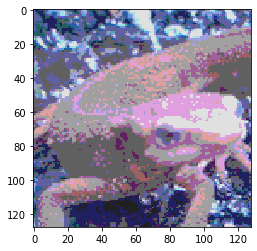

In [53]:
img = img*255
out = img.copy()

out = out // 64 * 64 + 32
out = out.astype(np.int)
plt.imshow(out)

## average pooling

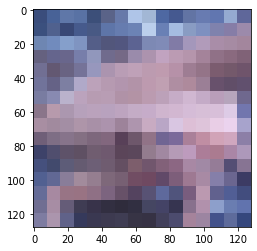

In [56]:
out = img.copy()

H, W, C = img.shape
G = 8
Nh = int(H / G)
Nw = int(W / G)

for y in range(Nh):
    for x in range(Nw):
        for c in range(C):
            out[G*y:G*(y+1), G*x:G*(x+1), c] = np.mean(out[G*y:G*(y+1), G*x:G*(x+1), c]).astype(np.int)
out = out.astype(np.int)
plt.imshow(out)

## max pooling 

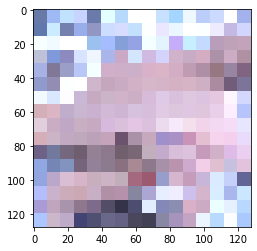

In [57]:
out = img.copy()

H, W, C = img.shape
G = 8
Nh = int(H / G)
Nw = int(W / G)

for y in range(Nh):
    for x in range(Nw):
        for c in range(C):
            out[G*y:G*(y+1), G*x:G*(x+1), c] = np.max(out[G*y:G*(y+1), G*x:G*(x+1), c])

out = out.astype(np.int)
plt.imshow(out)

## 高斯滤波（Gaussian Filter）

高斯滤波器是一种可以使图像平滑的滤波器，用于去除噪声。可用于去除噪声的滤波器还有中值滤波器，平滑滤波、LoG 滤波器。

高斯滤波器将中心像素周围的像素按照高斯分布加权平均进行平滑化。这样的（二维）权值通常被称为卷积核或者滤波器。

但是，由于图像的长宽可能不是滤波器大小的整数倍，因此我们需要在图像的边缘补0。这种方法称作 Zero Padding。并且权值（卷积核）要进行归一化操作(sum g = 1)。

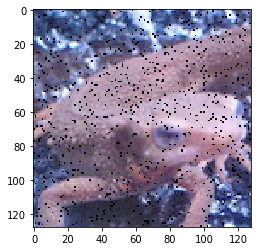

In [79]:
img=mpimg.imread('imori_noise.jpg').copy()
plt.imshow(img)

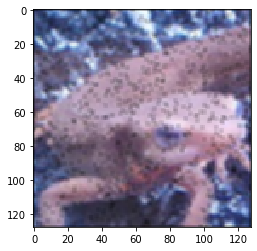

In [80]:
H, W, C = img.shape

K_size = 3
sigma = 1.3

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)

K = np.zeros((K_size, K_size), dtype=np.float)
for x in range(-pad, -pad+K_size):
    
    for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = np.exp( -(x**2 + y**2) / (2* (sigma**2)))
K /= (sigma * np.sqrt(2 * np.pi))
K /= K.sum()

tmp = out.copy()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y, pad+x, c] = np.sum(K * tmp[y:y+K_size, x:x+K_size, c])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

out = out.astype(np.int)
plt.imshow(out)

##  中值滤波（Median filter）

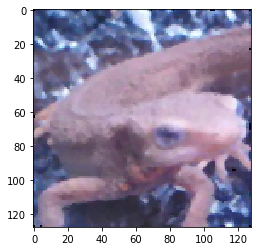

In [81]:
H, W, C = img.shape


K_size = 3

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)

tmp = out.copy()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y, pad+x, c] = np.median(tmp[y:y+K_size, x:x+K_size, c])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

out = out.astype(np.int)
plt.imshow(out)

## 均值滤波器

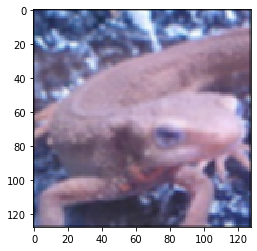

In [62]:
H, W, C = img.shape


K_size = 3

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y, pad+x, c] = np.mean(tmp[y:y+K_size, x:x+K_size, c])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)
out = out.astype(np.int)
plt.imshow(out)

## Motion Filter

Motion Filter 取对角线方向的像素的平均值，像下式这样定义：

  1/3  0   0
[  0  1/3  0 ]
   0   0  1/3

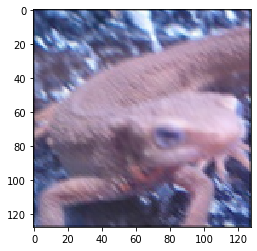

In [63]:
H, W, C = img.shape

K_size = 3

K = np.diag( [1] * K_size ).astype(np.float)
K /= K_size

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y, pad+x, c] = np.sum(K * tmp[y:y+K_size, x:x+K_size, c])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)
out = out.astype(np.int)
plt.imshow(out)

## MAX-MIN 滤波器

MAX-MIN 滤波器使用网格内像素的最大值和最小值的差值对网格内像素重新赋值。通常用于边缘检测。边缘检测用于检测图像中的线。像这样提取图像中的信息的操作被称为特征提取。边缘检测通常在灰度图像上进行。

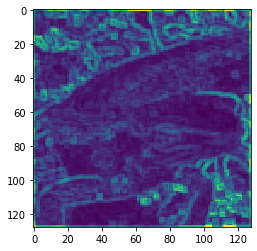

In [64]:
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
gray = gray.astype(np.uint8)

K_size = 3

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.max(tmp[y:y+K_size, x:x+K_size]) - np.min(tmp[y:y+K_size, x:x+K_size])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)
out = out.astype(np.int)
plt.imshow(out)

## 微分滤波器

微分滤波器对图像亮度急剧变化的边缘有提取效果，可以获得邻接像素的差值。

    (a)纵向         (b)横向
      0 -1  0            0 0 0
K = [ 0  1  0 ]   K = [ -1 1 0 ]
      0  0  0            0 0 0

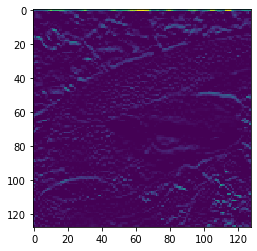

In [65]:
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
gray = gray.astype(np.uint8)

K_size = 3

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

out_v = out.copy()
out_h = out.copy()

Kv = [[0., -1., 0.],[0., 1., 0.],[0., 0., 0.]]
Kh = [[0., 0., 0.],[-1., 1., 0.], [0., 0., 0.]]

for y in range(H):
    for x in range(W):
        out_v[pad+y, pad+x] = np.sum(Kv * (tmp[y:y+K_size, x:x+K_size]))
        out_h[pad+y, pad+x] = np.sum(Kh * (tmp[y:y+K_size, x:x+K_size]))

out_v[out_v < 0] = 0
out_h[out_h < 0] = 0
out_v[out_v > 255] = 255
out_h[out_h > 255] = 255

out_v = out_v[pad:pad+H, pad:pad+W].astype(np.uint8)
out_h = out_h[pad:pad+H, pad:pad+W].astype(np.uint8)

out_v = out_v.astype(np.int)
plt.imshow(out_v)

## Sobel 滤波器

Sobel 滤波器可以提取特定方向的边缘，滤波器按下式定义：

    (a)纵向       (b)横向
      1 0 -1            1  2  1
      
K =   2 0 -2       k=     0  0  0 

      1 0 -1           -1 -2 -1

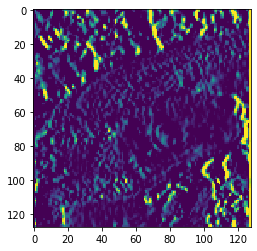

In [67]:
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
gray = gray.astype(np.uint8)

K_size = 3

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

K = [[1., 0., -1.],[2., 0., -2.],[1., 0., -1.]]
#K = [[1., 2., 1.],[0., 0., 0.], [-1., -2., -1.]]

for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.sum(K * (tmp[y:y+K_size, x:x+K_size]))

out[out < 0] = 0
out[out > 255] = 255

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)
out = out.astype(np.int)
plt.imshow(out)

## Laplacian 滤波器

Laplacian 滤波器是对图像亮度进行二次微分从而检测边缘的滤波器

      0  1  0
K = [ 1 -4  1 ]


      0  1  0

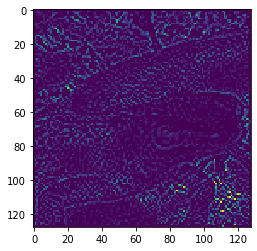

In [68]:
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
gray = gray.astype(np.uint8)

K_size = 3

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

K = [[0., 1., 0.],[1., -4., 1.], [0., 1., 0.]]

for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.sum(K * (tmp[y:y+K_size, x:x+K_size]))

out[out < 0] = 0
out[out > 255] = 255

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)
out = out.astype(np.int)
plt.imshow(out)

## Emboss 滤波器

Emboss 滤波器可以使物体轮廓更加清晰

      -2 -1  0
K = [ -1  1  1 ]

       0  1  2

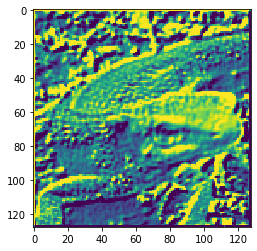

In [72]:
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
gray = gray.astype(np.uint8)

K_size = 3

pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

K = [[-2., -1., 0.],[-1., 1., 1.], [0., 1., 2.]]

for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.sum(K * (tmp[y:y+K_size, x:x+K_size]))

out[out < 0] = 0
out[out > 255] = 255

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)
out = out.astype(np.int)
plt.imshow(out)

## LoG 滤波器

LoG 即高斯-拉普拉斯（ Laplacian of Gaussian ）的缩写，使用高斯滤波器使图像平滑化之后再使用拉普拉斯滤波器使图像的轮廓更加清晰。

为了防止拉普拉斯滤波器计算二次微分会使得图像噪声更加明显，所以我们首先使用高斯滤波器来抑制噪声。

LoG 滤波器使用以下式子定义：

LoG(x,y) = (x^2 + y^2 - s^2) / (2 * pi * s^6) * exp(-(x^2+y^2) / (2*s^2))

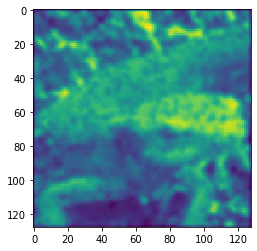

In [82]:
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
gray = gray.astype(np.uint8)

# Gaussian Filter
K_size = 5
s = 3

## Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

## Kernel
K = np.zeros((K_size, K_size), dtype=np.float)
for x in range(-pad, -pad+K_size):
    for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = (x**2 + y**2 - s**2) * np.exp( -(x**2 + y**2) / (2* (s**2)))
K /= (2 * np.pi * (s**6))
K /= K.sum()

for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.sum(K * tmp[y:y+K_size, x:x+K_size])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)
out = out.astype(np.int)
plt.imshow(out)

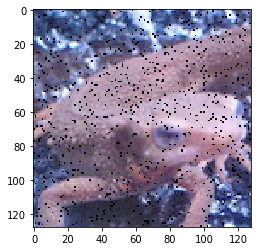

In [83]:
plt.imshow(img.astype(np.int))

## Histogram Normalization

有时直方图会存在偏差。比如说，数据集中在 0 处（左侧）的图像全体会偏暗，数据集中在255 处（右侧）的图像会偏亮。如果直方图有所偏向，那么其动态范围（ dynamic range ）就会较低。为了使人能更清楚地看见图片，让直方图归一化、平坦化是十分必要的。

这种归一化直方图的操作被称作灰度变换（Grayscale Transformation）。像素点取值范围从 [c,d] 转换到 [a,b] 的过程由下式定义。这回我们将imori_dark.jpg的灰度扩展到 [0, 255] 范围。

xout = {  a                         (xin < c)

         (b-a)/(d-c) * (xin-c) + a  (c <= xin <= d)
         
          b                         (d < xin)

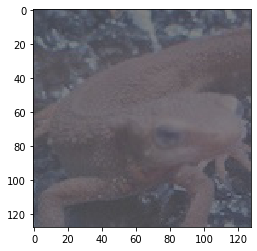

In [84]:
img=mpimg.imread('imori_dark.jpg').copy()
plt.imshow(img)

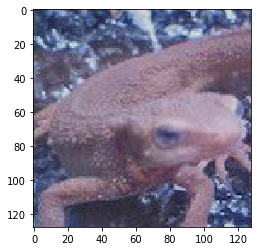

In [85]:
H, W, C = img.shape

a, b = 0., 255.

vmin = img.min()
vmax = img.max()

out = img.copy()
out = (b-a) / (vmax - vmin) * (out - vmin) + a
out = out.astype(np.uint8)
out = out.astype(np.int)
plt.imshow(out)

## 直方图操作

让直方图的平均值m0=128，标准差s0=52​吧！

这里并不是变更直方图的动态范围，而是让直方图变得平坦。

可以使用下式将平均值为m标准差为s的直方图变成平均值为m0标准差为s0的直方图：

xout = s0 / s * (xin - m) + m0

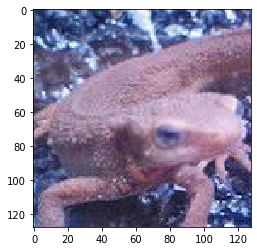

In [86]:
H, W, C = img.shape

m0 = 128
s0 = 52

m = np.mean(img)
s = np.std(img)

out = img.copy()
out = s0 / s * (out - m) + m0
out[out < 0] = 0
out[out > 255] = 255
out = out.astype(np.uint8)
out = out.astype(np.int)
plt.imshow(out)

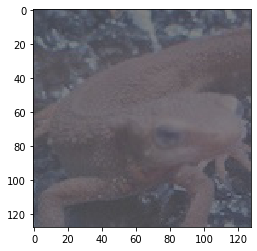

In [87]:
plt.imshow(img)

## 直方图均衡化（ Histogram Equalization ）

来让均匀化直方图吧！

直方图均衡化是使直方图变得平坦的操作，是不需要计算上面的问题中的平均值、标准差等数据使直方图的值变得均衡的操作。

均衡化操作由以下式子定义。S是总的像素数；Zmax是像素点的最大取值（在这里是 255）；h(z)表示取值为z的累积分布函数：

Z' = Zmax / S * Sum{i=0:z} h(z)

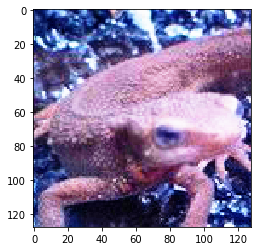

In [88]:
H, W, C = img.shape

S = H * W * C * 1.

out = img.copy()

sum_h = 0.
z_max = 255.

for i in range(1, 255):
    ind = np.where(img == i)
    sum_h += len(img[ind])
    z_prime = z_max / S * sum_h
    out[ind] = z_prime

out = out.astype(np.uint8)
out = out.astype(np.int)
plt.imshow(out)

## 伽玛校正（Gamma Correction）

伽马校正用来对照相机等电子设备传感器的非线性光电转换特性进行校正。如果图像原样显示在显示器等上，画面就会显得很暗。伽马校正通过预先增大 RGB 的值来排除显示器的影响，达到对图像修正的目的。

由于下式引起非线性变换，在该式中，x被归一化，限定在[0,1]范围内。c是常数，g为伽马变量（通常取2.2）：

x' = c * Iin ^ g
因此，使用下面的式子进行伽马校正：

Iout = (1/c * Iin) ^ (1/g)

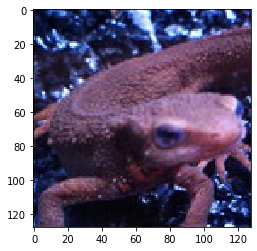

In [90]:
img=mpimg.imread('imori_gamma.jpg').copy()
plt.imshow(img)

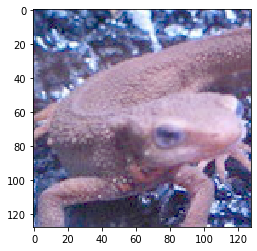

In [93]:
c = 1.
g = 2.2

out = img.copy()
out = out / 255.
out = (1/c * out) ** (1/g)

out *= 255
out = out.astype(np.uint8)
plt.imshow(out)

## 最邻近插值（ Nearest-neighbor Interpolation ）

最近邻插值在图像放大时补充的像素取最临近的像素的值。由于方法简单，所以处理速度很快，但是放大图像画质劣化明显。

使用下面的公式放大图像吧！I'为放大后图像，I为放大前图像，a为放大率，方括号为取整操作：

I'(x,y) = I([x/a], [y/a])

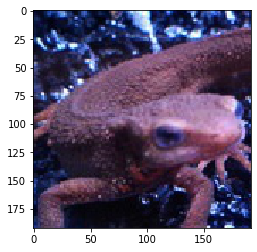

In [94]:
H, W, C = img.shape

a = 1.5
aH = int(a * H)
aW = int(a * W)

y = np.arange(aH).repeat(aW).reshape(aW, -1)
x = np.tile(np.arange(aW), (aH, 1))
y = np.round(y / a).astype(np.int)
x = np.round(x / a).astype(np.int)

out = img[y,x]

out = out.astype(np.uint8)
plt.imshow(out)

## 双线性插值（ Bilinear Interpolation ）

双线性插值考察4邻域的像素点，根据距离设置权值。虽然计算量增大使得处理时间变长，但是可以有效抑制画质劣化。

放大图像的座标(x',y')除以放大率a，得到对应原图像的座标floor(x'/a, y'/a)。
求原图像的座标(x'/a, y'/a)周围4邻域的座标I(x,y), I(x+1,y), I(x,y+1), I(x+1, y+1)
I(x,y)    I(x+1,y) 
     * (x'/a,y'/a)
I(x,y+1)  I(x+1,y+1)
分别求这4个点与(x'/a, y'/a)的距离，根据距离设置权重：w = d / Sum d
根据下式求得放大后图像(x',y')处的像素值： dx = x'/a - x , dy = y'/a - y
I'(x',y') = (1-dx)(1-dy)I(x,y) + dx(1-dy)I(x+1,y) + (1-dx)dyI(x,y+1) + dxdyI(x+1,y+1)

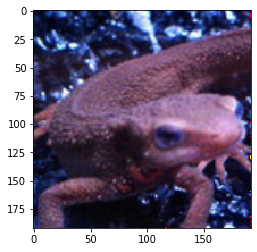

In [95]:
H, W, C = img.shape
a = 1.5
aH = int(a * H)
aW = int(a * W)

y = np.arange(aH).repeat(aW).reshape(aW, -1)
x = np.tile(np.arange(aW), (aH, 1))
y = (y / a)
x = (x / a)

ix = np.floor(x).astype(np.int)
iy = np.floor(y).astype(np.int)

ix = np.minimum(ix, W-2)
iy = np.minimum(iy, H-2)

dx = x - ix
dy = y - iy

dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)


out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]

out[out>255] = 255
out = out.astype(np.uint8)
plt.imshow(out)

## 仿射变换（ Afine Transformations ）——平行移动

原图像记为(x,y)，变换后的图像记为(x',y')。

图像放大缩小矩阵为下式：

[ x' ] = [a b][x]

  y'      c d  y
  
另一方面，平行移动按照下面的式子计算：

[ x' ] = [x] + [tx]

  y'      y  +  ty
  
把上面两个式子盘成一个：

  x'       a b tx    x
  
[ y' ] = [ c d ty ][ y ]

  1        0 0  1    1
  
特别的，使用以下的式子进行平行移动：

  x'       1 0 tx    x
  
[ y' ] = [ 0 1 ty ][ y ]

  1        0 0  1    1

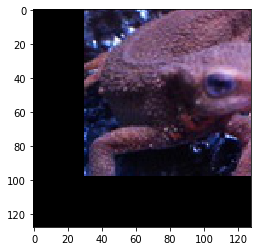

In [96]:
H, W, C = img.shape

a = 1.
b = 0.
c = 0.
d = 1.
tx = 30
ty = -30

y = np.arange(H).repeat(W).reshape(W, -1)
x = np.tile(np.arange(W), (H, 1))

out = np.zeros((H+1, W+1, C), dtype=np.float32)

x_new = a * x + b * y + tx
y_new = c * x + d * y + ty

x_new = np.minimum(np.maximum(x_new, 0), W).astype(np.int)
y_new = np.minimum(np.maximum(y_new, 0), H).astype(np.int)

out[y_new, x_new] = img[y, x]
out = out[:H, :W]
out = out.astype(np.uint8)
plt.imshow(out)

## 仿射变换（ Afine Transformations ）——放大缩小

使用仿射变换，将图片在x方向上放大1.3倍，在y方向上缩小至0.8倍。
在上面的条件下，同时在x方向上像右平移30（+30），在y方向上向上平移30（-30）。

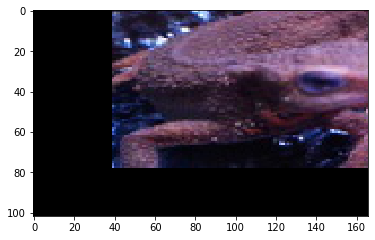

In [99]:
_img=mpimg.imread('imori_gamma.jpg').copy()
H, W, C = _img.shape

a = 1.3
b = 0.
c = 0.
d = 0.8
tx = 30
ty = -30

img = np.zeros((H+2, W+2, C), dtype=np.float32)
img[1:H+1, 1:W+1] = _img

H_new = np.round(H * d).astype(np.int)
W_new = np.round(W * a).astype(np.int)
out = np.zeros((H_new+1, W_new+1, C), dtype=np.float32)

x_new = np.tile(np.arange(W_new), (H_new, 1))
y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

adbc = a * d - b * c
x = np.round((d * x_new  - b * y_new) / adbc).astype(np.int) - tx + 1
y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)

out[y_new, x_new] = img[y, x]

out = out[:H_new, :W_new]
out = out.astype(np.uint8)
plt.imshow(out)

## 仿射变换（ Afine Transformations ）——旋转

使用仿射变换，逆时针旋转30度。
使用仿射变换，逆时针旋转30度并且能让全部图像显现（也就是说，单纯地做仿射变换会让图片边缘丢失，这一步中要让图像的边缘不丢失，需要耗费一些工夫）。
使用下面的式子进行逆时针方向旋转A度的仿射变换：

  x'   =    cosA -sinA tx    x
  
[ y' ] = [ sinA  cosA ty ][ y ]

  1    =    0     0    1    1

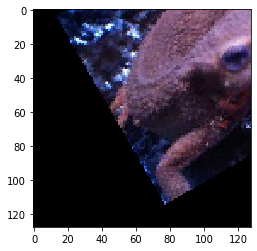

In [101]:
H, W, C = _img.shape


# Affine

A = 30.
theta = - np.pi * A / 180.

a = np.cos(theta)
b = -np.sin(theta)
c = np.sin(theta)
d = np.cos(theta)
tx = 10
ty = 10

img = np.zeros((H+2, W+2, C), dtype=np.float32)
img[1:H+1, 1:W+1] = _img

H_new = np.round(H).astype(np.int)
W_new = np.round(W).astype(np.int)
out = np.zeros((H_new, W_new, C), dtype=np.float32)

x_new = np.tile(np.arange(W_new), (H_new, 1))
y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

adbc = a * d - b * c
x = np.round((d * x_new  - b * y_new) / adbc).astype(np.int) - tx + 1
y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)

out[y_new, x_new] = img[y, x]

out = out.astype(np.uint8)
plt.imshow(out)

## 仿射变换（Afine Transformations）——倾斜

使用仿射变换，输出（1）那样的x轴倾斜30度的图像（dx=30），这种变换被称为X-sharing。
使用仿射变换，输出（2）那样的y轴倾斜30度的图像（dy=30），这种变换被称为Y-sharing。
使用仿射变换，输出（3）那样的x轴、y轴都倾斜30度的图像(dx = 30, dy = 30)。
原图像的大小为hxw，使用下面各式进行仿射变换。

(1) X-sharing                 (2) Y-sharing

   a = dx / h                     a = dy / w

  x'       1 a tx    x           x'       1 0 tx    x
  
[ y' ] = [ 0 1 ty ][ y ]       [ y' ] = [ a 1 ty ][ y ]

  1        0 0  1    1           1        0 0  1    1

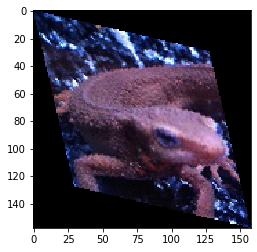

In [105]:
H, W, C = _img.shape

dx = 30.
dy = 30.
a = 1.
b = dx / H
c = dy / W
d = 1.
tx = 0.
ty = 0.

img = np.zeros((H+2, W+2, C), dtype=np.float32)
img[1:H+1, 1:W+1] = _img

H_new = np.ceil(dy + H).astype(np.int)
W_new = np.ceil(dx + W).astype(np.int)
out = np.zeros((H_new, W_new, C), dtype=np.float32)

x_new = np.tile(np.arange(W_new), (H_new, 1))
y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

adbc = a * d - b * c
x = np.round((d * x_new  - b * y_new) / adbc).astype(np.int) - tx + 1
y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)

out[y_new, x_new] = img[y, x]
out = out.astype(np.uint8)
plt.imshow(out)

## Canny 边缘检测：第一步——边缘强度

使用高斯滤波；
在x方向和y方向上使用 Sobel 滤波器，在此之上求出边缘的强度和边缘的梯度；
对梯度幅值进行非极大值抑制（Non-maximum suppression）来使边缘变得更细；
使用滞后阈值来对阈值进行处理。
上面就是图像边缘检测的方法了。在这里我们先完成第一步和第二步。按照以下步骤进行处理：

将图像进行灰度化处理；
将图像进行高斯滤波（5x 5,s=1.4）；
在x方向和y方向上使用 Sobel 滤波器，在此之上求出边缘梯度fx和fy。边缘梯度可以按照下式求得：
梯度幅值 edge = sqrt(fx^2 + fy^2)
梯度方向 tan = arctan(fy / fx)
使用下面的公式将梯度方向量化：

angle = {   0  (if -0.4142 < tan <= 0.4142)

           45  (if  0.4142 < tan < 2.4142)
           
           90  (if  |tan| >= 2.4142)
           
          135  (if -2.4142 < tan <= -0.4142)

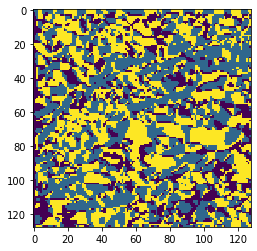

In [111]:
H, W, C = _img.shape

gray = 0.2126 * img[:,:, 2] + 0.7152 * img[:,:, 1] + 0.0722 * img[:,:, 0]

K_size = 5
sigma = 1.4

pad = K_size // 2
gau = np.zeros((H + pad*2, W + pad*2), dtype=np.float32)
gau = np.pad(gray, (pad, pad), 'edge')
tmp = gau.copy()

K = np.zeros((K_size, K_size), dtype=np.float32)
for x in range(-pad, -pad+K_size):
    for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = np.exp( -(x**2 + y**2) / (2* (sigma**2)))
K /= (sigma * np.sqrt(2 * np.pi))
K /= K.sum()

for y in range(H):
    for x in range(W):
        gau[pad+y, pad+x] = np.sum(K * tmp[y:y+K_size, x:x+K_size])

KSV = np.array(((-1., -2., -1.), (0., 0., 0.), (1., 2., 1.)), dtype=np.float32)
KSH = np.array(((-1., 0., 1.), (-2., 0., 2.), (-1., 0., 1.)), dtype=np.float32)

gau = gau[pad-1:H+pad+1, pad-1:W+pad+1]
fy = np.zeros_like(gau, dtype=np.float32)
fx = np.zeros_like(gau, dtype=np.float32)
K_size = 3
pad = K_size // 2

for y in range(H):
    for x in range(W):
        fy[pad+y, pad+x] = np.sum(KSV * gau[y:y+K_size, x:x+K_size])
        fx[pad+y, pad+x] = np.sum(KSH * gau[y:y+K_size, x:x+K_size])
        
fx = fx[pad:pad+H, pad:pad+W]
fy = fy[pad:pad+H, pad:pad+W]

edge = np.sqrt(np.power(fx, 2) + np.power(fy, 2))
fx[fx == 0] = 1e-5
tan = np.arctan(fy / fx)
angle = np.zeros_like(tan, dtype=np.uint8)
angle[np.where((tan > -0.4142) & (tan <= 0.4142))] = 0
angle[np.where((tan > 0.4142) & (tan < 2.4142))] = 45
angle[np.where((tan >= 2.4142) | (tan <= -2.4142))] = 95
angle[np.where((tan > -2.4142) & (tan <= -0.4142))] = 135

out = angle.astype(np.uint8)
plt.imshow(out)

## Canny 边缘检测：第二步——边缘细化

非极大值抑制是对除去非极大值以外的值的操作的总称（这个术语在其它的任务中也经常出现）。

在这里，我们比较我们我们所关注的地方梯度的法线方向邻接的三个像素点的梯度幅值，如果该点的梯度值不比其它两个像素大，那么这个地方的值设置为0。

也就是说，我们在注意梯度幅值edge(x,y)的时候，可以根据下式由梯度方向angle(x,y)来变换edge(x,y)：

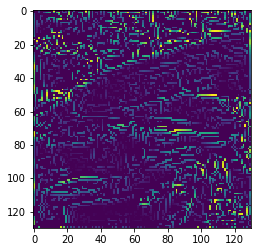

In [112]:
H, W, C = img.shape

# Gray
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

# Gaussian Filter
K_size = 5
sigma = 1.4

## Zero padding
pad = K_size // 2
gau = np.zeros((H + pad*2, W + pad*2), dtype=np.float32)
#gau[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float32)
gau = np.pad(gray, (pad, pad), 'edge')
tmp = gau.copy()

## Kernel
K = np.zeros((K_size, K_size), dtype=np.float32)
for x in range(-pad, -pad+K_size):
    for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = np.exp( -(x**2 + y**2) / (2* (sigma**2)))
K /= (sigma * np.sqrt(2 * np.pi))
K /= K.sum()

for y in range(H):
    for x in range(W):
        gau[pad+y, pad+x] = np.sum(K * tmp[y:y+K_size, x:x+K_size])

## Sobel vertical
KSV = np.array(((-1., -2., -1.), (0., 0., 0.), (1., 2., 1.)), dtype=np.float32)
## Sobel horizontal
KSH = np.array(((-1., 0., 1.), (-2., 0., 2.), (-1., 0., 1.)), dtype=np.float32)

gau = gau[pad-1:H+pad+1, pad-1:W+pad+1]
fy = np.zeros_like(gau, dtype=np.float32)
fx = np.zeros_like(gau, dtype=np.float32)
K_size = 3
pad = K_size // 2

for y in range(H):
    for x in range(W):
        fy[pad+y, pad+x] = np.sum(KSV * gau[y:y+K_size, x:x+K_size])
        fx[pad+y, pad+x] = np.sum(KSH * gau[y:y+K_size, x:x+K_size])
        
fx = fx[pad:pad+H, pad:pad+W]
fy = fy[pad:pad+H, pad:pad+W]

# Non-maximum suppression
edge = np.sqrt(np.power(fx, 2) + np.power(fy, 2))
fx[fx == 0] = 1e-5
tan = np.arctan(fy / fx)
## Angle quantization
angle = np.zeros_like(tan, dtype=np.uint8)
angle[np.where((tan > -0.4142) & (tan <= 0.4142))] = 0
angle[np.where((tan > 0.4142) & (tan < 2.4142))] = 45
angle[np.where((tan >= 2.4142) | (tan <= -2.4142))] = 95
angle[np.where((tan > -2.4142) & (tan <= -0.4142))] = 135

for y in range(H):
    for x in range(W):
        if angle[y, x] == 0:
            dx1, dy1, dx2, dy2 = -1, 0, 1, 0
        elif angle[y, x] == 45:
            dx1, dy1, dx2, dy2 = -1, 1, 1, -1
        elif angle[y, x] == 90:
            dx1, dy1, dx2, dy2 = 0, -1, 0, 1
        elif angle[y, x] == 135:
            dx1, dy1, dx2, dy2 = -1, -1, 1, 1
        if x == 0:
            dx1 = max(dx1, 0)
            dx2 = max(dx2, 0)
        if x == W-1:
            dx1 = min(dx1, 0)
            dx2 = min(dx2, 0)
        if y == 0:
            dy1 = max(dy1, 0)
            dy2 = max(dy2, 0)
        if y == H-1:
            dy1 = min(dy1, 0)
            dy2 = min(dy2, 0)
        if max(max(edge[y, x], edge[y+dy1, x+dx1]), edge[y+dy2, x+dx2]) != edge[y, x]:
            edge[y, x] = 0
            
out = edge.astype(np.uint8)
plt.imshow(out)

## Canny 边缘检测：第三步——滞后阈值

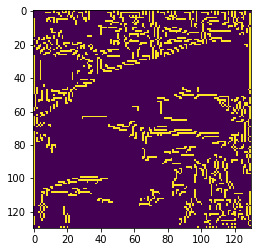

In [113]:
H, W, C = img.shape

# Gray
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

# Gaussian Filter
K_size = 5
sigma = 1.4

## Zero padding
pad = K_size // 2
gau = np.zeros((H + pad*2, W + pad*2), dtype=np.float32)
#gau[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float32)
gau = np.pad(gray, (pad, pad), 'edge')
tmp = gau.copy()

## Kernel
K = np.zeros((K_size, K_size), dtype=np.float32)
for x in range(-pad, -pad+K_size):
    for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = np.exp( -(x**2 + y**2) / (2* (sigma**2)))
K /= (sigma * np.sqrt(2 * np.pi))
K /= K.sum()

for y in range(H):
    for x in range(W):
        gau[pad+y, pad+x] = np.sum(K * tmp[y:y+K_size, x:x+K_size])

## Sobel vertical
KSV = np.array(((-1., -2., -1.), (0., 0., 0.), (1., 2., 1.)), dtype=np.float32)
## Sobel horizontal
KSH = np.array(((-1., 0., 1.), (-2., 0., 2.), (-1., 0., 1.)), dtype=np.float32)

gau = gau[pad-1:H+pad+1, pad-1:W+pad+1]
fy = np.zeros_like(gau, dtype=np.float32)
fx = np.zeros_like(gau, dtype=np.float32)
K_size = 3
pad = K_size // 2

for y in range(H):
    for x in range(W):
        fy[pad+y, pad+x] = np.sum(KSV * gau[y:y+K_size, x:x+K_size])
        fx[pad+y, pad+x] = np.sum(KSH * gau[y:y+K_size, x:x+K_size])
        
fx = fx[pad:pad+H, pad:pad+W]
fy = fy[pad:pad+H, pad:pad+W]

# Non-maximum suppression
edge = np.sqrt(np.power(fx, 2) + np.power(fy, 2))
fx[fx == 0] = 1e-5
tan = np.arctan(fy / fx)
## Angle quantization
angle = np.zeros_like(tan, dtype=np.uint8)
angle[np.where((tan > -0.4142) & (tan <= 0.4142))] = 0
angle[np.where((tan > 0.4142) & (tan < 2.4142))] = 45
angle[np.where((tan >= 2.4142) | (tan <= -2.4142))] = 95
angle[np.where((tan > -2.4142) & (tan <= -0.4142))] = 135

for y in range(H):
    for x in range(W):
        if angle[y, x] == 0:
            dx1, dy1, dx2, dy2 = -1, 0, 1, 0
        elif angle[y, x] == 45:
            dx1, dy1, dx2, dy2 = -1, 1, 1, -1
        elif angle[y, x] == 90:
            dx1, dy1, dx2, dy2 = 0, -1, 0, 1
        elif angle[y, x] == 135:
            dx1, dy1, dx2, dy2 = -1, -1, 1, 1
        if x == 0:
            dx1 = max(dx1, 0)
            dx2 = max(dx2, 0)
        if x == W-1:
            dx1 = min(dx1, 0)
            dx2 = min(dx2, 0)
        if y == 0:
            dy1 = max(dy1, 0)
            dy2 = max(dy2, 0)
        if y == H-1:
            dy1 = min(dy1, 0)
            dy2 = min(dy2, 0)
        if max(max(edge[y, x], edge[y+dy1, x+dx1]), edge[y+dy2, x+dx2]) != edge[y, x]:
            edge[y, x] = 0


# Histeresis threshold
HT = 100
LT = 30
edge[edge >= HT] = 255
edge[edge <= LT] = 0

_edge = np.zeros((H+2, W+2), dtype=np.float32)
_edge[1:H+1, 1:W+1] = edge

## 8 - Nearest neighbor
nn = np.array(((1., 1., 1.), (1., 0., 1.), (1., 1., 1.)), dtype=np.float32)

for y in range(1, H+2):
    for x in range(1, W+2):
        if _edge[y, x] < LT or _edge[y, x] > HT:
            continue
        if np.max(_edge[y-1:y+2, x-1:x+2] * nn) >= HT:
            _edge[y, x] = 255
        else:
            _edge[y, x] = 0

edge = _edge[1:H+1, 1:W+1]
            
out = edge.astype(np.uint8)
plt.imshow(out)

## 使用误差平方和算法（Sum of Squared Difference）进行模式匹配（Template Matching）

模式匹配，即寻找待匹配图像和全体图像中最相似的部分，用于物体检测任务。现在虽然使用卷积神经网络（CNN）来检测物体，但是模式识别仍然是最基本的处理方法。

下面介绍具体算法。原图像记为I（H x W），待匹配图像为T（h x w）：

对于图像I：、for ( j = 0, H-h) for ( i = 0, W-w)在一次移动1像素的过程中，原图像I的一部分I(i:i+w, j:j+h)与待匹配图像计算相似度S。
S最大或最小的地方即为匹配的位置。
S的计算方法主要有 SSD、SAD（第55题）、NCC（第56题）、ZNCC（第57题）等。对于不同的方法，我们需要选择出最大值或者最小值。

在这里我们使用误差平方和SSD（Sum of Squared Difference）。SSD计算像素值的差的平方和，S取误差平方和最小的地方。

S = Sum_{x=0:w, y=0:h} (I(i+x, j+y) - T(x, y) )^2
顺便说一句，像模式匹配这样，从图像的左上角开始往右进行顺序查找的操作一般称作光栅扫描（Raster Scan）或者滑动窗口扫

可以使用cv2.rectangle ()来画矩形。另外，imoripart.jpg稍微改变了颜色。

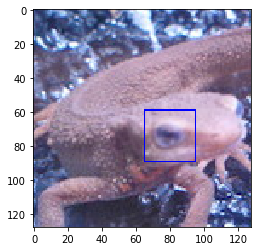

In [115]:
img=mpimg.imread('imori.jpg').copy()
H, W, C = img.shape

temp = mpimg.imread("imori_part.jpg").astype(np.float32).copy()
Ht, Wt, Ct = temp.shape


i, j = -1, -1
v = 255 * H * W * C
for y in range(H-Ht):
    for x in range(W-Wt):
        _v = np.sum((img[y:y+Ht, x:x+Wt] - temp) ** 2)
        if _v < v:
            v = _v
            i, j = x, y

out = img.copy()
cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
out = out.astype(np.uint8)
plt.imshow(out)

## 使用绝对值差和（Sum of Absolute Differences）进行模式匹配

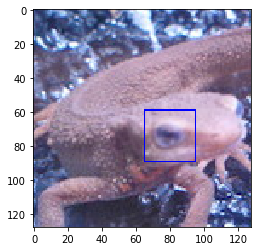

In [116]:
H, W, C = img.shape
Ht, Wt, Ct = temp.shape


i, j = -1, -1
v = 255 * H * W * C
for y in range(H-Ht):
    for x in range(W-Wt):
        _v = np.sum(np.abs(img[y:y+Ht, x:x+Wt] - temp))
        if _v < v:
            v = _v
            i, j = x, y

out = img.copy()
cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
out = out.astype(np.uint8)
plt.imshow(out)

## 使用归一化交叉相关（Normalization Cross Correlation）进行模式匹配

归一化交叉相关（Normalization Cross Correlation）求出两个图像的相似度，匹配S最大处的图像：

     Sum_{x=0:w, y=0:h} |I(i+x, j+y) T(x, y)|
     
S = -----------------------------------------------------------------------------

    Sqrt(Sum_{x=0:w, y=0:h} I(i+x, j+y)^2) * Sqrt(Sum_{x=0:w, y=0:h} T(x, y)^2)
    
S最后的范围在-1<=S<=1。NCC对变化十分敏感。

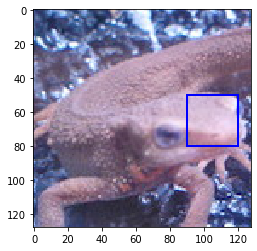

In [118]:
H, W, C = img.shape
Ht, Wt, Ct = temp.shape


i, j = -1, -1
v = -1
for y in range(H-Ht):
    for x in range(W-Wt):
        _v = np.sum(img[y:y+Ht, x:x+Wt] * temp)
        _v /= (np.sqrt(np.sum(img[y:y+Ht, x:x+Wt]**2)) * np.sqrt(np.sum(temp**2)))
        if _v > v:
            v = _v
            i, j = x, y

out = img.copy()
cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
out = out.astype(np.uint8)
plt.imshow(out)

## 使用零均值归一化交叉相关（Zero-mean Normalization Cross Correlation）进行模式匹配

零均值归一化交叉相关（Zero-mean Normalization Cross Correlation）求出两个图像的相似度，匹配S最大处的图像。

图像I的平均值记为mi，图像T的平均值记为mt。使用下式计算S：

       Sum_{x=0:w, y=0:h} |(I(i+x, j+y)-mi) (T(x, y)-mt)|
       
S = --------------------------------------------------------------------------------------

    Sqrt(Sum_{x=0:w, y=0:h} (I(i+x, j+y)-mi)^2) * Sqrt(Sum_{x=0:w, y=0:h} (T(x, y)-mt)^2)
    
S最后的范围在-1<=S<=1。零均值归一化积相关去掉平均值的话就是归一化交叉相关，据说这比归一化交叉相关对变换更加敏感（但是这里匹配失败了）。

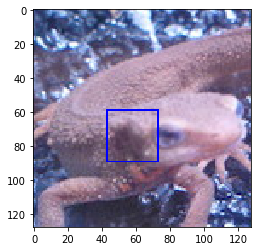

In [119]:
mi = np.mean(img)
mt = np.mean(temp)

i, j = -1, -1
v = -1
for y in range(H-Ht):
    for x in range(W-Wt):
        _v = np.sum((img[y:y+Ht, x:x+Wt]-mi) * (temp-mt))
        _v /= (np.sqrt(np.sum((img[y:y+Ht, x:x+Wt]-mi)**2)) * np.sqrt(np.sum((temp-mt)**2)))
        if _v > v:
            v = _v
            i, j = x, y

out = img.copy()
cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
out = out.astype(np.uint8)
plt.imshow(out)

## 透明混合（Alpha Blending）

透明混合即通过设定透明度（Alpha值）来设定图像透明度的方法。在 OpenCV 中虽然没有透明度这个参数，但在PIL等库中有。在这里我们手动设定透明度。

将两张图片重合的时候，这个方法是有效的。

将img1和img2按1:1的比例重合的时候，使用下面的式子。通过改变 Alpha 值，你可以更改两张图片重叠的权重。

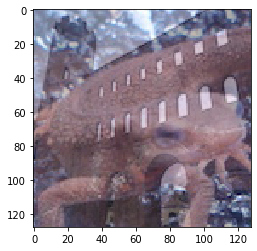

In [120]:
img2 = mpimg.imread("thorino.jpg").astype(np.float32).copy()

a = 0.6
out = img * a + img2 * (1 - a)
out = out.astype(np.uint8)
plt.imshow(out)

## 掩膜（Masking）

使用HSV对imori.jpg进行掩膜处理，只让蓝色的地方变黑。

像这样通过使用黑白二值图像将对应于黑色部分的原始图像的像素改变为黑色的操作被称为掩膜。

要提取蓝色部分，请先创建这样的二进制图像，使得HSV色彩空间中�180<=H<=260的位置的像素值设为1，并将其0和1反转之后与原始图像相乘。

这使得可以在某种程度上将蝾螈（从背景上）分离出来。

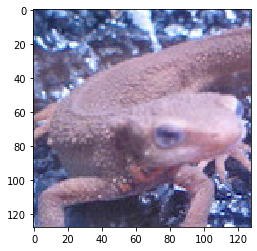

In [127]:
img = mpimg.imread("imori.jpg").astype(np.float32).copy() 
img = img/255.

/Users/sizhenhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


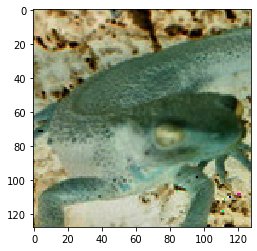

In [128]:
max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0

ind = np.where(min_arg == 0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60

ind = np.where(min_arg == 2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180

ind = np.where(min_arg == 1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    
V = max_v.copy()
S = max_v.copy() - min_v.copy()


mask = np.zeros_like(H)
mask[np.where((H>180) & (H<260))] = 1

mask = 1 - mask
out = img.copy() * 255.

for c in range(3):
    out[..., c] *= mask

out = out.astype(np.uint8)
plt.imshow(out)

## 掩膜（色彩追踪（Color Tracking）+形态学处理）

/Users/sizhenhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


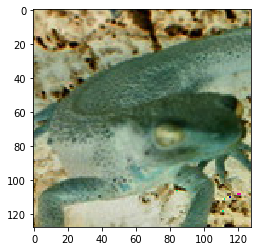

In [129]:
max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0

ind = np.where(min_arg == 0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60

ind = np.where(min_arg == 2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180

ind = np.where(min_arg == 1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    
V = max_v.copy()
S = max_v.copy() - min_v.copy()

mask = np.zeros_like(H)
mask[np.where((H>180) & (H<260))] = 255

h, w, _ = img.shape

MF = np.array(((0, 1, 0),
               (1, 0, 1),
               (0, 1, 0)), dtype=np.int)

Dil_time = 5

for i in range(Dil_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                mask[y-1, x-1] = 255

Erode_time = 5

for i in range(Erode_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                mask[y-1, x-1] = 0

Erode_time = 5

for i in range(Erode_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                mask[y-1, x-1] = 0

Dil_time = 5

for i in range(Dil_time):
    tmp = np.pad(mask, (1, 1), 'edge')
    for y in range(1, h+1):
        for x in range(1, w+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                mask[y-1, x-1] = 255

mask = 1 - mask / 255
out = img.copy() * 255.

for c in range(3):
    out[..., c] *= mask

out = out.astype(np.uint8)
plt.imshow(out)

## 高斯金字塔（Gaussian Pyramid）

在这里我们求出原图像1/2, 1/4, 1/8, 1/16, 1/32大小的图像。

像这样把原图像缩小之后（像金字塔一样）重叠起来的就被称为高斯金字塔。

这种高斯金字塔的方法现在仍然有效。高斯金字塔的方法也用于提高图像清晰度的超分辨率成像（Super-Resolution ）深度学习方法。

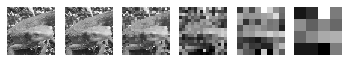

In [130]:
H, W, C = img.shape

# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

def resize(img, a):
    _h, _w  = img.shape
    h = int(a * _h)
    w = int(a * _w)
    """
    y = np.arange(h).repeat(w).reshape(w, -1)
    x = np.tile(np.arange(w), (h, 1))
    y = np.floor(y / a).astype(np.int)
    x = np.floor(x / a).astype(np.int)
    y = np.minimum(y, _h-1)
    x = np.minimum(x, _w-1)
    out = img[y,x]
    """
    y = np.arange(h).repeat(w).reshape(w, -1)
    x = np.tile(np.arange(w), (h, 1))
    y = (y / a)
    x = (x / a)

    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)
    ix = np.minimum(ix, _w-2)
    iy = np.minimum(iy, _w-2)

    dx = x - ix
    dy = y - iy

    
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]
    out[out>255] = 255

    return out

pyramid = [gray]
for i in range(1, 6):
    a = 2. ** i
    p = resize(gray, 1. / a)
    pyramid.append(p)

for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(pyramid[i], cmap='gray')
    plt.axis('off')
    plt.xticks(color="None")
    plt.yticks(color="None")

plt.show()

## 显著图（Saliency Map）

显著图是将一副图像中容易吸引人的眼睛注意的部分（突出）表现的图像。

虽然现在通常使用深度学习的方法计算显著图，但是一开始人们用图像的RGB成分或者HSV成分创建高斯金字塔，并通过求差来得到显著图（例如Itti等人的方法）。

在这里我们使用在问题75中得到的高斯金字塔来简单地求出显著图。算法如下：

我们使用双线性插值调整图像大小至1/128, 1/64, 1/32, ……，一开始是缩放至1/128。
将得到的金字塔（我们将金字塔的各层分别编号为0,1,2,3,4,5）两两求差。
将第2步中求得的差分全部相加，并正规化至[0,255]。
完成以上步骤就可以得到显著图了。虽然第2步中并没有指定要选择哪两张图像，但如果选择两个好的图像，则可以像答案那样得到一张显著图。

从图上可以清楚地看出，蝾螈的眼睛部分和颜色与周围不太一样的地方变成了白色，这些都是人的眼睛容易停留的地方。

解答例( (0,1), (0,3), (0,5), (1,4), (2,3), (3,5) を使用)

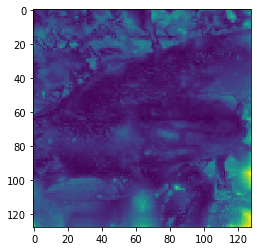

In [131]:
H, W, C = img.shape

# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

def resize(img, a):
    _h, _w  = img.shape
    h = int(a * _h)
    w = int(a * _w)
    """
    y = np.arange(h).repeat(w).reshape(w, -1)
    x = np.tile(np.arange(w), (h, 1))
    y = np.floor(y / a).astype(np.int)
    x = np.floor(x / a).astype(np.int)
    y = np.minimum(y, _h-1)
    x = np.minimum(x, _w-1)
    out = img[y,x]
    """
    y = np.arange(h).repeat(w).reshape(w, -1)
    x = np.tile(np.arange(w), (h, 1))
    y = (y / a)
    x = (x / a)

    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)
    ix = np.minimum(ix, _w-2)
    iy = np.minimum(iy, _w-2)

    dx = x - ix
    dy = y - iy
    
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]
    out[out>255] = 255

    return out

pyramid = [gray]
for i in range(1, 6):
    a = 2. ** i
    p = resize(gray, 1. / a)
    p = resize(p, a)
    pyramid.append(p)
    
out = np.zeros((H, W), dtype=np.float32)

out += np.abs(pyramid[0] - pyramid[1])
out += np.abs(pyramid[0] - pyramid[3])
out += np.abs(pyramid[0] - pyramid[5])
out += np.abs(pyramid[1] - pyramid[4])
out += np.abs(pyramid[2] - pyramid[3])
out += np.abs(pyramid[3] - pyramid[5])


out = out / out.max() * 255

out = out.astype(np.uint8)
plt.imshow(out)

## 随机裁剪（Random Cropping）

这里，从图像中随机切出200个60 x 60的矩形。

并且，满足下面的条件：

使用np.random.seed(0)，求出裁剪的矩形的左上角座标x1 = np.random.randint(W-60)和y1=np.random.randint(H-60)；
如果和 Ground-truth （gt = np.array((47, 41, 129, 103), dtype=np.float32)）的 IoU 大于 0.5，那么就打上标注 1，小于 0.5 就打上标注 0。
答案中，标注 1 的矩形用红色画出，标注 0 的矩形用蓝色的线画出，Ground-truth 用绿色的线画出。在这里我们简单地准备蝾螈头部和头部以外的图像。

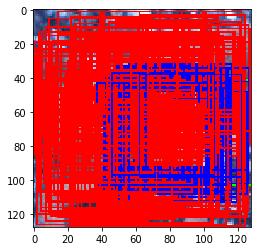

In [132]:
H, W, C = img.shape

# Grayscale
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]

gt = np.array((47, 41, 129, 103), dtype=np.float32)

cv2.rectangle(img, (gt[0], gt[1]), (gt[2], gt[3]), (0,255,0), 1)

def iou(a, b):
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    iou_x1 = np.maximum(a[0], b[0])
    iou_y1 = np.maximum(a[1], b[1])
    iou_x2 = np.minimum(a[2], b[2])
    iou_y2 = np.minimum(a[3], b[3])
    iou_w = max(iou_x2 - iou_x1, 0)
    iou_h = max(iou_y2 - iou_y1, 0)
    area_iou = iou_w * iou_h
    iou = area_iou / (area_a + area_b - area_iou)
    return iou


# crop and create database
Crop_num = 200
L = 60

for i in range(Crop_num):
    x1 = np.random.randint(W-L)
    y1 = np.random.randint(H-L)
    x2 = x1 + L
    y2 = y1 + L
    crop = np.array((x1, y1, x2, y2))

    _iou = iou(gt, crop)

    if _iou >= 0.5:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 1)
        label = 1
    else:
        cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 1)
        label = 0
plt.imshow(img)